In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

rng = np.random.RandomState(0)
digits = datasets.load_digits()

In [2]:
print("Total de itens: ", len(digits['images']))
print("Dimensão incial: ", len(digits['images'][-1]),  "x", len(digits['images'][-1][-1]))

Total de itens:  1797
Dimensão incial:  8 x 8


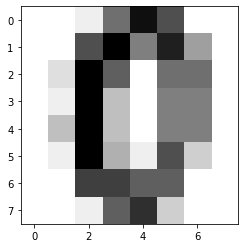

In [12]:
plt.figure(1, figsize=(4, 4))
plt.imshow(digits.images[10], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

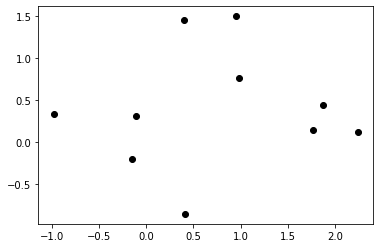

In [4]:
x = rng.randn(10)
y = rng.randn(10)

plt.plot(x, y, 'o', color='black');

In [5]:
# Passo 1: Escolher centroids
def get_random_centroids(data='data'):
    indexes = rng.randint(0, len(digits[data]), size=(1, 10))[0]
    centroids = []
    for index in indexes:
        centroids.append(digits[data][index])
    return np.array(centroids)

def get_choosen_centroids(data='data', begin=0):
    targets = np.array(range(0,10))
    centroids = []
    
    for target in targets:
        for i in range(begin, len(digits[data])):
            if digits['target'][i] == target:
                centroids.append(digits[data][i])
                break
    return np.array(centroids)

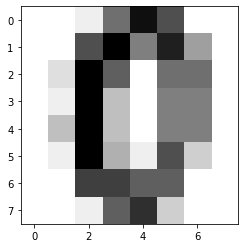

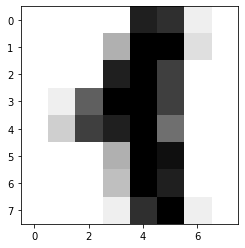

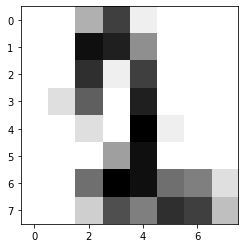

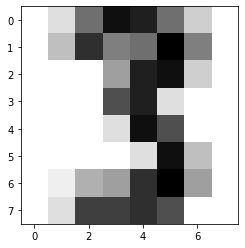

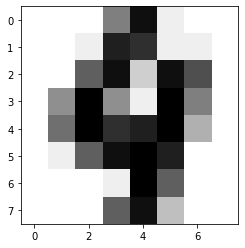

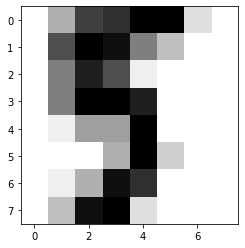

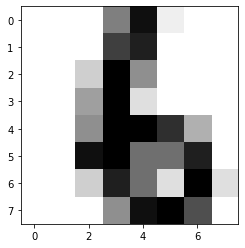

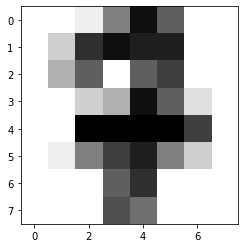

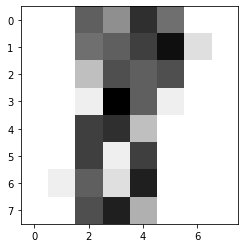

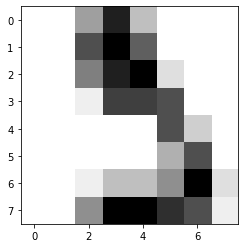

In [15]:
def plot_initial_centroids(random=True):
    if random:
        centroids = get_random_centroids('images')
    else:
        centroids = get_choosen_centroids('images', 10)
        
    for centroid in centroids:
        plt.figure(1, figsize=(4, 4))
        plt.imshow(centroid, cmap=plt.cm.gray_r, interpolation="nearest")
        plt.show()
plot_initial_centroids(random=False)        

In [7]:
# Passo 2: Calcular distância e classificar dados

def dist_euclidiana(v1,v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    diff = v1 - v2
    quad_dist = np.dot(diff, diff)
    return math.sqrt(quad_dist)

def dist_manhattan(v1,v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    diff = v1 - v2    
    absolute = np.abs(diff)
    return np.sum(absolute)


numbers = digits['images']

def update_clusters(centroids):
    clusters = [[],[],[],[],[],[],[],[],[],[]]
    for j in range(0, len(numbers)):
        number = numbers[j]
        distance = sys.maxsize
        group = -1

        for i in range(0, len(centroids)):
            new_distance = dist_manhattan(number, centroids[i])
            if(distance > new_distance):
                distance = new_distance
                group = i

        clusters[group].append([number, j])
    return clusters

In [8]:
# Passo 3: Atualizar as centroids

def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        new_centroid = np.zeros((8,8))
        for number in cluster:
            new_centroid += number[0]
        centroids.append(new_centroid/len(cluster))
    return np.array(centroids)

In [9]:
# Passo 3: Calcular o erro

def get_error(old_centroids, new_centoids):
    error = 0
    for i in range(0, len(old_centroids)):
        error += dist_manhattan(old_centroids[i], new_centoids[i])
    return error/len(old_centroids)

In [36]:
def k_means():
    centroids = get_choosen_centroids('images', rng.randint(0, len(digits['data'])-200))
    # centroids = get_choosen_centroids('images', 1000)]
    # centroids = get_random_centroids('images')
    clusters = update_clusters(centroids)
    new_centroids = update_centroids(clusters)
    new_error = get_error(centroids, new_centroids)
    
    while(new_error > 0):
        print(new_error)
        new_centroids = update_centroids(clusters)
        new_error = get_error(centroids, new_centroids)

        centroids = new_centroids
        clusters = update_clusters(new_centroids)
    return clusters
        
groups = k_means()

print('-------')

def get_result(clusters):
    errors = []
    for j in range(0, len(clusters)):
        item = clusters[j]
        for n in item:
            if digits['target'][n[1]] != j:
                errors.append([[digits['target'][n[1]], j], n[1]])
    return errors

result = get_result(groups)
print("Erros:", len(result))
print("Acertos:", len(digits['data'])-len(result))

119.63525578478016
119.63525578478016
22.89400170302232
12.758883925400255
9.170806790690452
8.992484472383854
5.398418918733255
3.6488126349340435
2.3176625231370096
0.5730187222755682
0.4217414667745791
0.6093164140165072
0.5225152660018776
0.6424942454067768
0.13977591007733517
-------
Erros: 581
Acertos: 1216


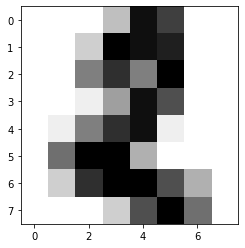

[[2, 1], 2]

In [31]:
erro = result[5]
plt.figure(1, figsize=(4, 4))
plt.imshow(digits.images[erro[1]], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()
erro